In [ ]:
!unzip archive.zip

Archive:  archive.zip
  inflating: spam.csv                


In [ ]:
import pandas as pd

df = pd.read_csv('/content/spam.csv', encoding='latin1')

In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)

In [ ]:
y = df.v1

In [ ]:
x=df.v2

Before applying any classifier, we need to convert the text data into a numerical format that machine learning models can understand. This process is called text vectorization. We'll use `TfidfVectorizer` for this, which transforms text into a sparse matrix of TF-IDF features.

Also, it's good practice to split the data into training and testing sets to evaluate the model's performance on unseen data.

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print("TF-IDF Vectorization complete.")
print(f"Shape of X_train_tfidf: {X_train_tfidf.shape}")
print(f"Shape of X_test_tfidf: {X_test_tfidf.shape}")

TF-IDF Vectorization complete.
Shape of X_train_tfidf: (4457, 5000)
Shape of X_test_tfidf: (1115, 5000)


Now that our text data is vectorized, we can train and evaluate a `LogisticRegression` classifier, a common and effective choice for binary classification problems like spam detection.

In [ ]:
# Initialize and train a Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred_logistic = logistic_model.predict(X_test_tfidf)

# Evaluate the Logistic Regression model
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print(f"Logistic Regression Accuracy: {accuracy_logistic:.4f}")
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logistic))

Logistic Regression Accuracy: 0.9587

Logistic Regression Classification Report:
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       965
        spam       0.97      0.71      0.82       150

    accuracy                           0.96      1115
   macro avg       0.96      0.86      0.90      1115
weighted avg       0.96      0.96      0.96      1115



Let's also try a `MultinomialNB` classifier, which is often a strong performer for text classification tasks.

In [ ]:
# Initialize and train a Multinomial Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred_nb = nb_model.predict(X_test_tfidf)

# Evaluate the Multinomial Naive Bayes model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Multinomial Naive Bayes Accuracy: {accuracy_nb:.4f}")
print("\nMultinomial Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))

Multinomial Naive Bayes Accuracy: 0.9731

Multinomial Naive Bayes Classification Report:
              precision    recall  f1-score   support

         ham       0.97      1.00      0.98       965
        spam       1.00      0.80      0.89       150

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.94      1115
weighted avg       0.97      0.97      0.97      1115



In [ ]:
cv_score = cross_val_score(nb_model, X_train_tfidf, y_train, cv=5).mean()
cv_score

np.float64(0.9744198336126587)

In [ ]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Initialize and train a Support Vector Machine model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test_tfidf)

# Evaluate the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Support Vector Machine Accuracy: {accuracy_svm:.4f}")
print("\nSupport Vector Machine Classification Report:")
print(classification_report(y_test, y_pred_svm))

Support Vector Machine Accuracy: 0.9794

Support Vector Machine Classification Report:
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       0.97      0.87      0.92       150

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [ ]:
# Initialize and train a Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred_dt = dt_model.predict(X_test_tfidf)

# Evaluate the Decision Tree model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.9722

Decision Tree Classification Report:
              precision    recall  f1-score   support

         ham       0.98      0.99      0.98       965
        spam       0.93      0.86      0.89       150

    accuracy                           0.97      1115
   macro avg       0.95      0.92      0.94      1115
weighted avg       0.97      0.97      0.97      1115



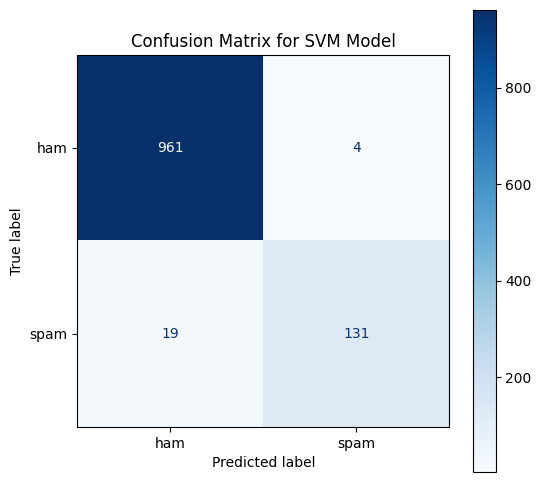

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate confusion matrix for SVM model
cm_svm = confusion_matrix(y_test, y_pred_svm, labels=svm_model.classes_)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=svm_model.classes_)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(6, 6))
disp_svm.plot(cmap=plt.cm.Blues, ax=ax)
ax.set_title('Confusion Matrix for SVM Model')
plt.show()